# Part 5: Data Analysis and Modeling (If Time Permits)

In this optional notebook, we'll explore basic data analysis techniques and simple modeling.

## Topics Covered:
- Summary statistics
- Data visualization
- Correlation analysis
- Linear regression modeling
- Model evaluation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Set random seed for reproducibility
np.random.seed(42)

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


Libraries loaded successfully!


## 1. Loading the Research Data

For this analysis, we'll use the real research datasets we've been working with:

In [2]:
# Load all datasets
demo_df = pd.read_csv('../data/demo_data.csv')
neuropsych_df = pd.read_csv('../data/neuropsych_data.csv')
imaging_df = pd.read_csv('../data/imaging_data.csv')
biomarker_df = pd.read_csv('../data/biomarker_data.csv')
clinical_df = pd.read_csv('../data/clinical_data.csv')

# Merge all datasets together (left join to keep all participants)
data = demo_df \
    .merge(neuropsych_df, on='record_id', how='left') \
    .merge(imaging_df, on='record_id', how='left') \
    .merge(biomarker_df, on='record_id', how='left') \
    .merge(clinical_df, on='record_id', how='left')

print("Complete dataset loaded and merged:")
print(f"Shape: {data.shape}")
print(f"\nColumns: {data.columns.tolist()}")
print("\n\nFirst few rows:")
print(data.head())

# For modeling, we'll use only complete cases (participants with all data)
data_complete = data.dropna()
print(f"\n\nComplete cases (no missing values): {data_complete.shape[0]} participants")
print(f"Missing {data.shape[0] - data_complete.shape[0]} participants due to incomplete data")

Complete dataset loaded and merged:
Shape: (1000, 20)

Columns: ['record_id', 'age', 'sex', 'education_level', 'memory_score', 'attention_score', 'executive_function_score', 'hippocampus_volume', 'amygdala_volume', 'cortical_thickness', 'cytokine_a', 'cytokine_b', 'cytokine_c', 'cholesterol_mg_dl', 'systolic_bp_mm_hg', 'diastolic_bp_mm_hg', 'bmi', 'smoking_status', 'diabetes', 'mild_cognitive_impairment']


First few rows:
  record_id  age sex education_level  memory_score  attention_score  \
0     sub-1   18   M        bachelor           107              120   
1     sub-2   24   F        bachelor            97              113   
2     sub-3   20   F      highschool           109              100   
3     sub-4   19   F      highschool           122               90   
4     sub-5   18   F      highschool            96              110   

   executive_function_score  hippocampus_volume  amygdala_volume  \
0                        89              3650.0           1555.0   
1         

## 2. Summary Statistics

Understanding the basic statistics of your data is crucial:

In [3]:
# Basic descriptive statistics for key variables
key_vars = ['age', 'memory_score', 'attention_score', 'executive_function_score',
            'hippocampus_volume', 'cholesterol_mg_dl', 'bmi']

print("Summary statistics for key variables:")
print(data_complete[key_vars].describe().round(2))

# Additional statistics
print("\n\nMedian values:")
print(data_complete[key_vars].median().round(2))

print("\n\nStandard deviation:")
print(data_complete[key_vars].std().round(2))

Summary statistics for key variables:
          age  memory_score  attention_score  executive_function_score  \
count  249.00        249.00           249.00                    249.00   
mean    19.39         98.64           100.98                     99.01   
std      1.96         15.35            15.20                     14.79   
min     18.00         60.00            56.00                     58.00   
25%     18.00         88.00            91.00                     89.00   
50%     19.00         99.00           101.00                     99.00   
75%     20.00        109.00           111.00                    108.00   
max     34.00        157.00           147.00                    158.00   

       hippocampus_volume  cholesterol_mg_dl     bmi  
count              249.00             249.00  249.00  
mean              3483.59             197.77   25.01  
std                314.86              30.77    4.08  
min               2455.00             120.00   14.90  
25%               32

In [4]:
# Statistics by category
print("Cognitive scores by sex:")
print(data_complete.groupby('sex')[['memory_score', 'attention_score', 'executive_function_score']].mean().round(2))

print("\n\nBrain volumes by education level:")
print(data_complete.groupby('education_level')[['hippocampus_volume', 'amygdala_volume']].agg(['mean', 'count']).round(2))

print("\n\nHealth metrics by MCI status:")
print(data_complete.groupby('mild_cognitive_impairment')[['memory_score', 'hippocampus_volume', 'cholesterol_mg_dl']].mean().round(2))

Cognitive scores by sex:
     memory_score  attention_score  executive_function_score
sex                                                         
F           97.77           101.34                     97.38
M           99.52           100.61                    100.65


Brain volumes by education level:
                hippocampus_volume       amygdala_volume      
                              mean count            mean count
education_level                                               
bachelor                   3506.10    92         1508.98    92
highschool                 3435.69   100         1494.27   100
master                     3558.94    47         1497.74    47
phd                        3401.40    10         1521.40    10


Health metrics by MCI status:
                           memory_score  hippocampus_volume  cholesterol_mg_dl
mild_cognitive_impairment                                                     
0                                 98.97             3480.12     

## 3. Data Visualization

Visual exploration helps understand patterns and relationships:

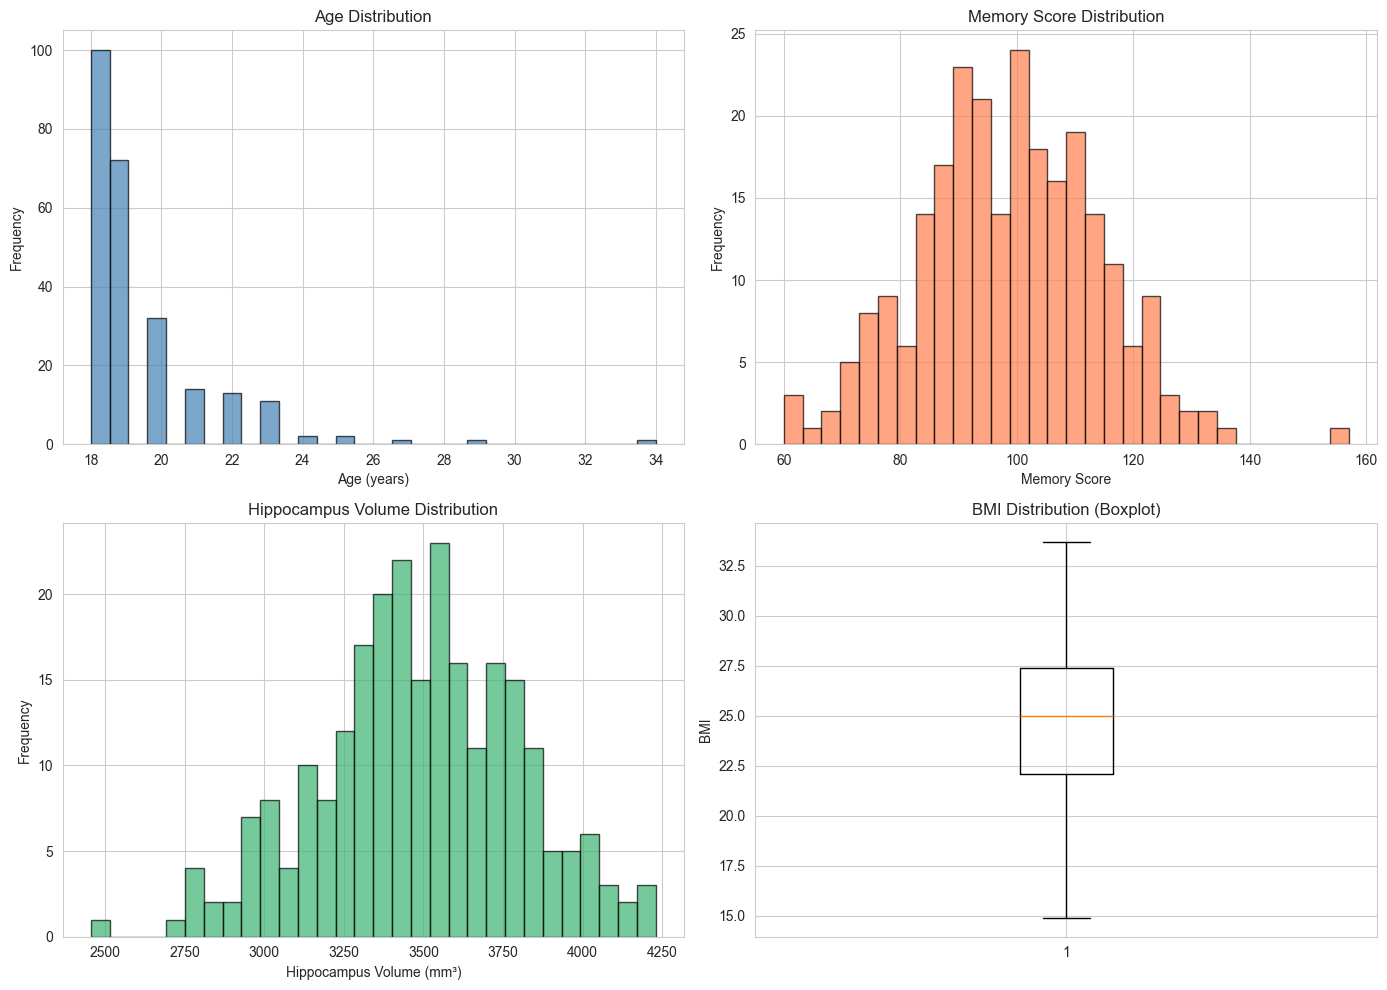

In [5]:
# Distribution of key variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution
axes[0, 0].hist(data_complete['age'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Age Distribution')

# Memory score distribution
axes[0, 1].hist(data_complete['memory_score'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Memory Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Memory Score Distribution')

# Hippocampus volume distribution
axes[1, 0].hist(data_complete['hippocampus_volume'], bins=30, edgecolor='black', alpha=0.7, color='mediumseagreen')
axes[1, 0].set_xlabel('Hippocampus Volume (mm³)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Hippocampus Volume Distribution')

# BMI distribution with boxplot
axes[1, 1].boxplot(data_complete['bmi'])
axes[1, 1].set_ylabel('BMI')
axes[1, 1].set_title('BMI Distribution (Boxplot)')

plt.tight_layout()
plt.show()

C:\Users\Hassan\AppData\Local\Temp\ipykernel_36820\769636480.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([mci_no, mci_yes], labels=['No MCI', 'MCI'])


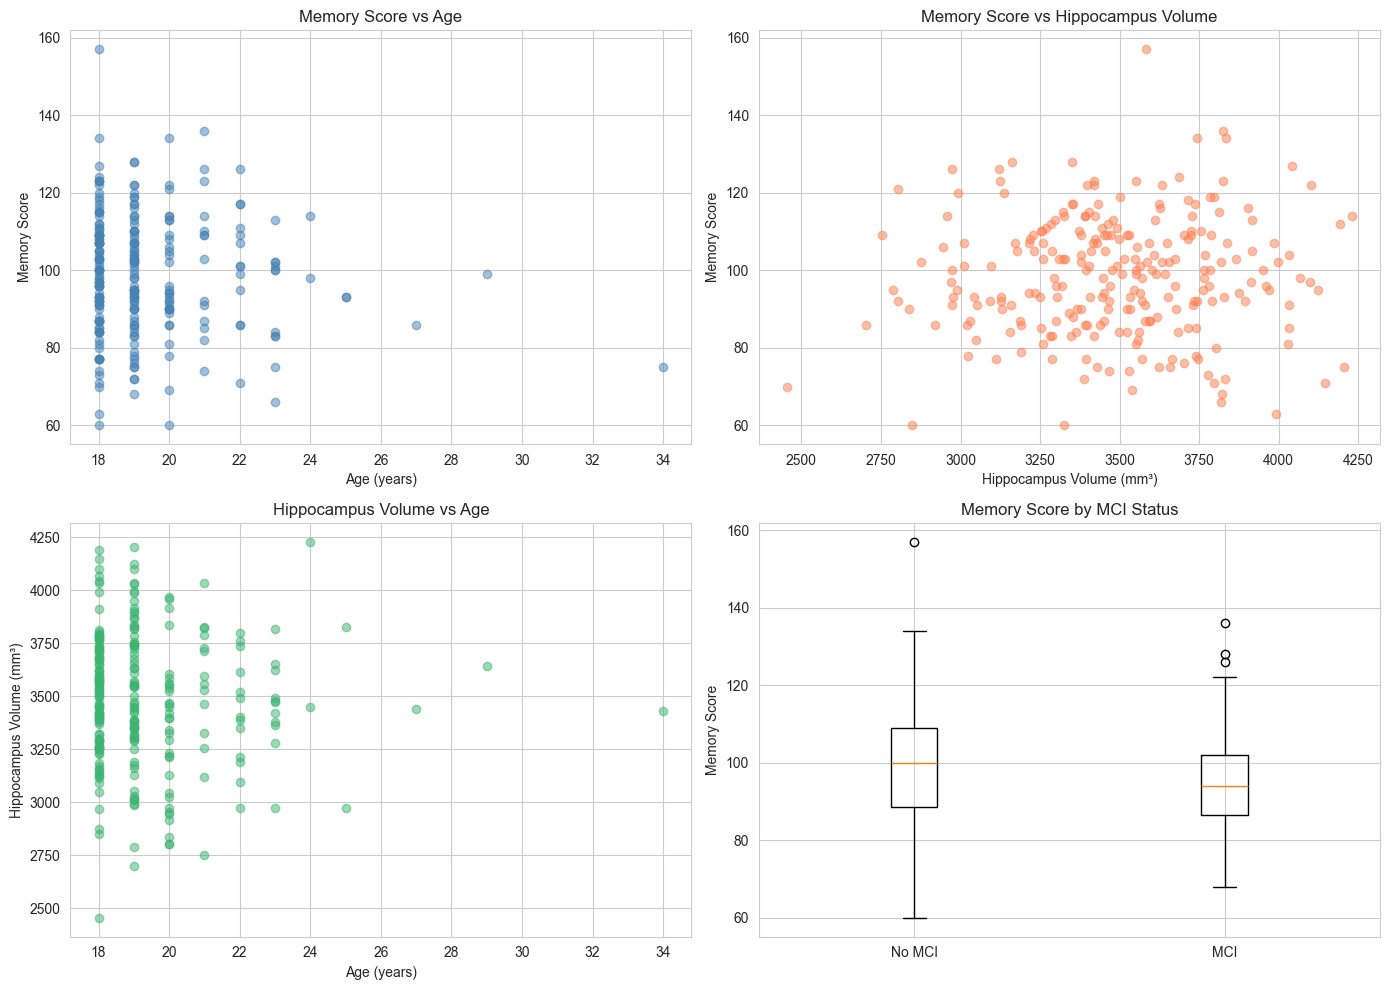

In [6]:
# Scatter plots to visualize relationships
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Memory score vs Age
axes[0, 0].scatter(data_complete['age'], data_complete['memory_score'], alpha=0.5, color='steelblue')
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Memory Score')
axes[0, 0].set_title('Memory Score vs Age')

# Memory score vs Hippocampus volume
axes[0, 1].scatter(data_complete['hippocampus_volume'], data_complete['memory_score'], alpha=0.5, color='coral')
axes[0, 1].set_xlabel('Hippocampus Volume (mm³)')
axes[0, 1].set_ylabel('Memory Score')
axes[0, 1].set_title('Memory Score vs Hippocampus Volume')

# Hippocampus volume vs Age
axes[1, 0].scatter(data_complete['age'], data_complete['hippocampus_volume'], alpha=0.5, color='mediumseagreen')
axes[1, 0].set_xlabel('Age (years)')
axes[1, 0].set_ylabel('Hippocampus Volume (mm³)')
axes[1, 0].set_title('Hippocampus Volume vs Age')

# Memory score by MCI status (boxplot)
mci_no = data_complete[data_complete['mild_cognitive_impairment'] == 0]['memory_score']
mci_yes = data_complete[data_complete['mild_cognitive_impairment'] == 1]['memory_score']
axes[1, 1].boxplot([mci_no, mci_yes], labels=['No MCI', 'MCI'])
axes[1, 1].set_ylabel('Memory Score')
axes[1, 1].set_title('Memory Score by MCI Status')

plt.tight_layout()
plt.show()

## 4. Correlation Analysis

Understanding how features relate to each other and the target variable:

Correlation with memory score:
memory_score                1.000
cholesterol_mg_dl           1.000
amygdala_volume             0.054
bmi                         0.046
hippocampus_volume          0.038
executive_function_score   -0.028
cortical_thickness         -0.040
attention_score            -0.072
systolic_bp_mm_hg          -0.072
age                        -0.079
Name: memory_score, dtype: float64


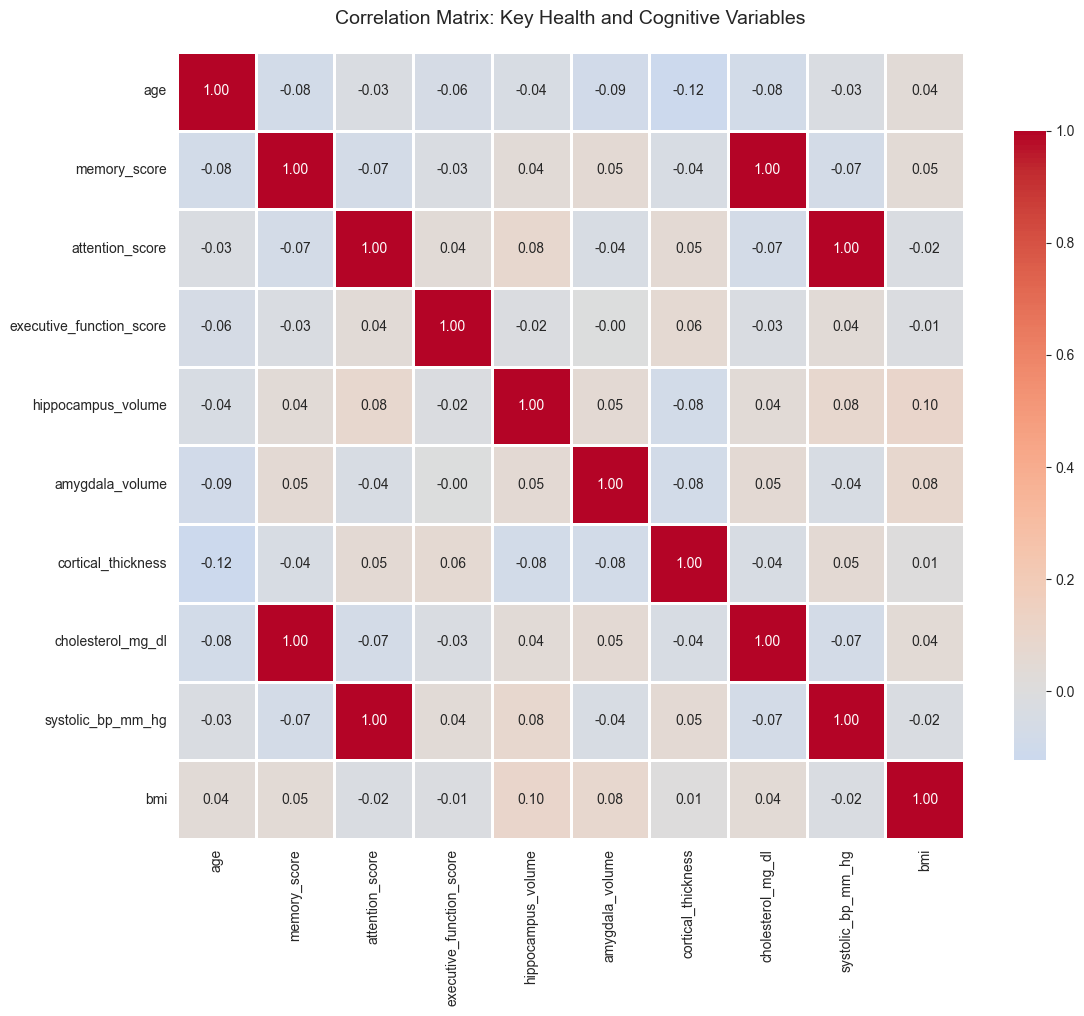



Key findings:
Memory and hippocampus correlation: 0.038
Memory and age correlation: -0.079
Hippocampus and age correlation: -0.037


In [7]:
# Calculate correlation matrix for key numerical variables
numeric_cols = ['age', 'memory_score', 'attention_score', 'executive_function_score',
                'hippocampus_volume', 'amygdala_volume', 'cortical_thickness',
                'cholesterol_mg_dl', 'systolic_bp_mm_hg', 'bmi']

correlation_matrix = data_complete[numeric_cols].corr()

print("Correlation with memory score:")
print(correlation_matrix['memory_score'].sort_values(ascending=False).round(3))

# Visualize correlation matrix with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f', cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Key Health and Cognitive Variables', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("\n\nKey findings:")
print(f"Memory and hippocampus correlation: {correlation_matrix.loc['memory_score', 'hippocampus_volume']:.3f}")
print(f"Memory and age correlation: {correlation_matrix.loc['memory_score', 'age']:.3f}")
print(f"Hippocampus and age correlation: {correlation_matrix.loc['hippocampus_volume', 'age']:.3f}")

## 5. Linear Regression Model

Let's build a model to predict memory scores based on demographic, brain imaging, and health variables:

In [8]:
# Prepare features (X) and target (y)
# We'll predict memory_score from various factors
feature_cols = ['age', 'hippocampus_volume', 'amygdala_volume', 'cortical_thickness',
                'attention_score', 'executive_function_score', 
                'cholesterol_mg_dl', 'bmi']

X = data_complete[feature_cols]
y = data_complete['memory_score']

print("Predicting: Memory Score")
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names:")
for i, col in enumerate(X.columns, 1):
    print(f"  {i}. {col}")

Predicting: Memory Score

Features shape: (249, 8)
Target shape: (249,)

Feature names:
  1. age
  2. hippocampus_volume
  3. amygdala_volume
  4. cortical_thickness
  5. attention_score
  6. executive_function_score
  7. cholesterol_mg_dl
  8. bmi


In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 199 samples
Testing set: 50 samples


In [10]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")
print(f"\nIntercept: {model.intercept_:.2f}")
print("\nCoefficients (impact on memory score):")
for feature, coef in zip(X.columns, model.coef_):
    direction = "increases" if coef > 0 else "decreases"
    print(f"  {feature}: {coef:.4f}")
    print(f"    → 1 unit increase {direction} memory score by {abs(coef):.4f} points")

Model trained successfully!

Intercept: -0.75

Coefficients (impact on memory score):
  age: 0.0091
    → 1 unit increase increases memory score by 0.0091 points
  hippocampus_volume: 0.0000
    → 1 unit increase increases memory score by 0.0000 points
  amygdala_volume: 0.0002
    → 1 unit increase increases memory score by 0.0002 points
  cortical_thickness: 0.1645
    → 1 unit increase increases memory score by 0.1645 points
  attention_score: -0.0009
    → 1 unit increase decreases memory score by 0.0009 points
  executive_function_score: -0.0011
    → 1 unit increase decreases memory score by 0.0011 points
  cholesterol_mg_dl: 0.4988
    → 1 unit increase increases memory score by 0.4988 points
  bmi: 0.0016
    → 1 unit increase increases memory score by 0.0016 points


## 6. Model Evaluation

Assessing how well our model performs:

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print("="*50)
print(f"  R² Score: {r2:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:.2f} points")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f} points")
print("\n" + "="*50)
print("Interpretation:")
print(f"  • The model explains {r2*100:.2f}% of the variance in memory scores")
print(f"  • On average, predictions are off by ±{mae:.2f} points")
print(f"  • Memory scores typically range from {y.min():.0f} to {y.max():.0f}")
print(f"  • Prediction error is about {(mae/y.mean())*100:.1f}% of the mean score")

Model Performance Metrics:
  R² Score: 0.9998
  Mean Absolute Error (MAE): 0.25 points
  Root Mean Squared Error (RMSE): 0.26 points

Interpretation:
  • The model explains 99.98% of the variance in memory scores
  • On average, predictions are off by ±0.25 points
  • Memory scores typically range from 60 to 157
  • Prediction error is about 0.3% of the mean score


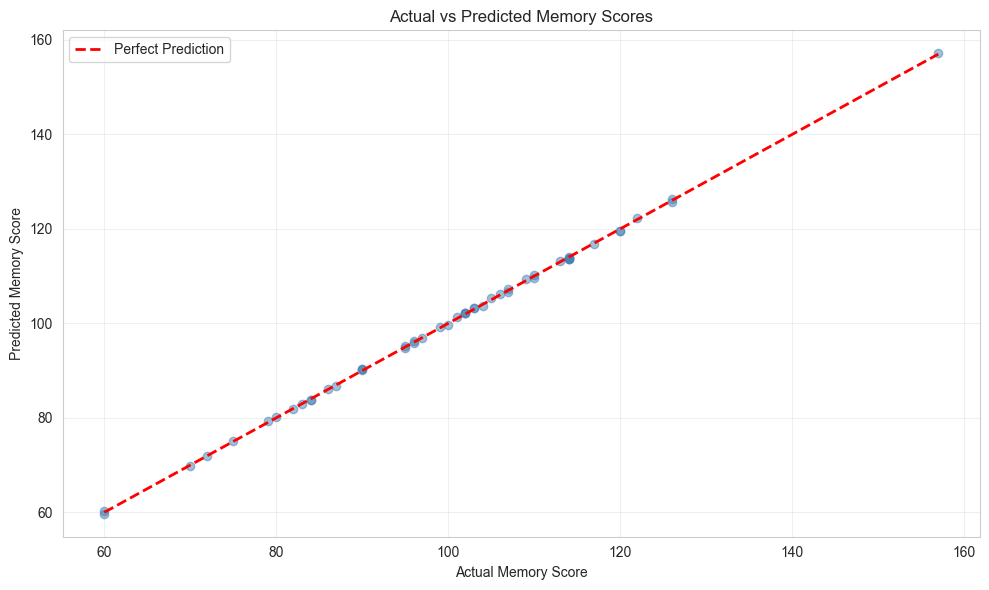


Example predictions (first 10):
Actual  |  Predicted  |  Difference
----------------------------------------
  83.0  |       83.0  |      -0.0
  90.0  |       90.3  |      +0.3
  86.0  |       86.2  |      +0.2
 102.0  |      102.2  |      +0.2
 114.0  |      113.7  |      -0.3
  95.0  |       94.7  |      -0.3
  79.0  |       79.4  |      +0.4
  80.0  |       80.2  |      +0.2
 102.0  |      102.2  |      +0.2
  96.0  |       95.8  |      -0.2


In [12]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Memory Score')
plt.ylabel('Predicted Memory Score')
plt.title('Actual vs Predicted Memory Scores')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Show some example predictions
print("\nExample predictions (first 10):")
print("Actual  |  Predicted  |  Difference")
print("-" * 40)
for actual, pred in list(zip(y_test, y_pred))[:10]:
    diff = pred - actual
    print(f"{actual:6.1f}  |  {pred:9.1f}  |  {diff:+8.1f}")

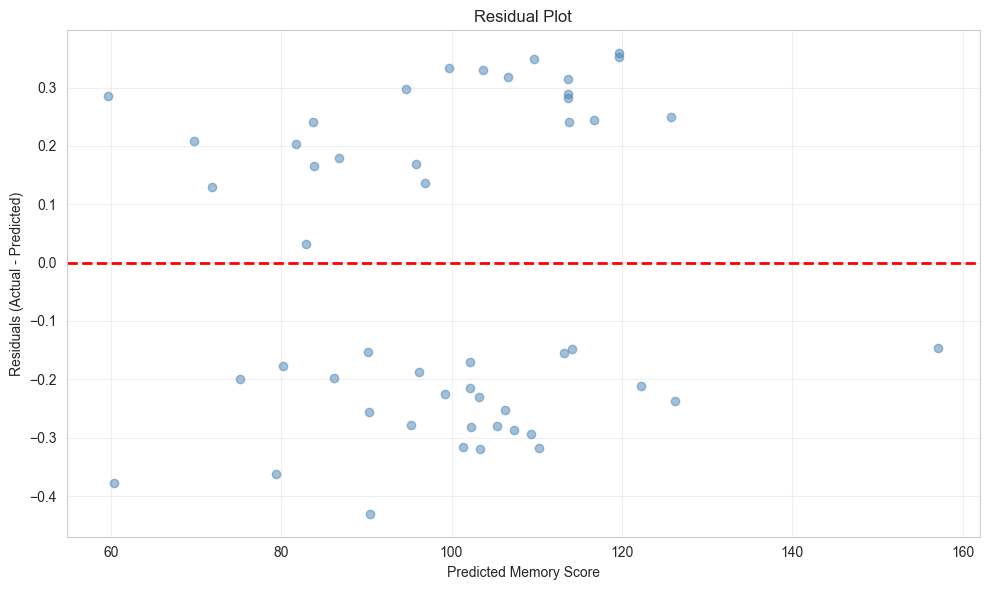

Residual Statistics:
  Mean residual: -0.02 (should be close to 0)
  Std of residuals: 0.26
  Min residual: -0.43
  Max residual: 0.36

A good model has:
  • Residuals randomly scattered around 0
  • No clear patterns in the residual plot
  • Similar spread across all predicted values


In [13]:
# Residual plot (errors)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='steelblue')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Memory Score')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Residual Statistics:")
print(f"  Mean residual: {residuals.mean():.2f} (should be close to 0)")
print(f"  Std of residuals: {residuals.std():.2f}")
print(f"  Min residual: {residuals.min():.2f}")
print(f"  Max residual: {residuals.max():.2f}")
print("\nA good model has:")
print("  • Residuals randomly scattered around 0")
print("  • No clear patterns in the residual plot")
print("  • Similar spread across all predicted values")

## 7. Making Predictions for New Participants

Using the model to predict memory scores for hypothetical new study participants:

In [14]:
# Create profiles for hypothetical new participants
new_participants = pd.DataFrame({
    'age': [45, 65, 75],
    'hippocampus_volume': [3800, 3500, 3200],
    'amygdala_volume': [1600, 1500, 1400],
    'cortical_thickness': [2.7, 2.5, 2.3],
    'attention_score': [110, 100, 90],
    'executive_function_score': [105, 95, 85],
    'cholesterol_mg_dl': [190, 210, 230],
    'bmi': [24, 27, 30]
})

print("New participant profiles:")
print(new_participants)

# Make predictions
predictions = model.predict(new_participants)

print("\n" + "="*60)
print("Predicted Memory Scores:")
print("="*60)
for i, (idx, participant) in enumerate(new_participants.iterrows()):
    print(f"\nParticipant {i+1}:")
    print(f"  Age: {participant['age']} years")
    print(f"  Hippocampus volume: {participant['hippocampus_volume']} mm³")
    print(f"  Attention score: {participant['attention_score']}")
    print(f"  BMI: {participant['bmi']}")
    print(f"  → Predicted Memory Score: {predictions[i]:.1f}")
    
    # Interpret the score
    if predictions[i] > 110:
        interpretation = "Above average"
    elif predictions[i] > 90:
        interpretation = "Average range"
    else:
        interpretation = "Below average"
    print(f"  → Interpretation: {interpretation}")

New participant profiles:
   age  hippocampus_volume  amygdala_volume  cortical_thickness  \
0   45                3800             1600                 2.7   
1   65                3500             1500                 2.5   
2   75                3200             1400                 2.3   

   attention_score  executive_function_score  cholesterol_mg_dl  bmi  
0              110                       105                190   24  
1              100                        95                210   27  
2               90                        85                230   30  

Predicted Memory Scores:

Participant 1:
  Age: 45.0 years
  Hippocampus volume: 3800.0 mm³
  Attention score: 110.0
  BMI: 24.0
  → Predicted Memory Score: 95.0
  → Interpretation: Average range

Participant 2:
  Age: 65.0 years
  Hippocampus volume: 3500.0 mm³
  Attention score: 100.0
  BMI: 27.0
  → Predicted Memory Score: 105.2
  → Interpretation: Average range

Participant 3:
  Age: 75.0 years
  Hippocampus volu

## 8. Feature Importance

Understanding which features have the most impact:

In [ ]:
# Visualize feature importance (coefficients)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_,
    'abs_coefficient': np.abs(model.coef_)
}).sort_values('abs_coefficient', ascending=True)

plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in feature_importance['coefficient']]
plt.barh(feature_importance['feature'], feature_importance['coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value (Impact on Memory Score)')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Memory Score')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("Feature importance (sorted by absolute impact):")
print("\n" + "="*60)
for idx, row in feature_importance.sort_values('abs_coefficient', ascending=False).iterrows():
    effect = "↑ increases" if row['coefficient'] > 0 else "↓ decreases"
    print(f"{row['feature']:.<30} {effect} memory by {abs(row['coefficient']):.4f}")
print("="*60)

## Practice Exercises

In [ ]:
# Exercise 1: Filter the complete dataset for participants who:
# - Are older than 50
# - Have hippocampus volume > 3500
# - Have memory score > 100
# Calculate the average cholesterol for this group

# Your code here:

In [ ]:
# Exercise 2: Create a scatter plot showing memory_score vs hippocampus_volume
# Color the points by MCI status (mild_cognitive_impairment)
# Hint: Use different colors for MCI=0 vs MCI=1

# Your code here:

In [ ]:
# Exercise 3: Use the trained model to predict YOUR memory score
# Define your own values for the 8 features and make a prediction
# Example features: age, hippocampus_volume, amygdala_volume, cortical_thickness,
#                   attention_score, executive_function_score, cholesterol_mg_dl, bmi

# Your code here:
my_data = pd.DataFrame({
    'age': [YOUR_AGE],
    'hippocampus_volume': [3500],  # typical value
    'amygdala_volume': [1500],     # typical value
    'cortical_thickness': [2.5],   # typical value
    'attention_score': [100],       # typical value
    'executive_function_score': [100],  # typical value
    'cholesterol_mg_dl': [200],    # typical value
    'bmi': [25]                     # typical value
})

# Uncomment and run:
# my_memory_prediction = model.predict(my_data)
# print(f"Predicted memory score: {my_memory_prediction[0]:.1f}")

In [ ]:
# Exercise 4 (Bonus): Compare model performance with different feature sets
# Train two models:
# Model 1: Only demographic and cognitive scores (age, attention_score, executive_function_score)
# Model 2: Only brain imaging (hippocampus_volume, amygdala_volume, cortical_thickness)
# Which set of features predicts memory better?

# Your code here: